In [1]:
import os
import glob
import numpy as np
# from ccdproc import ImageFileCollection
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.table import Table, hstack
from scipy.optimize import curve_fit

In [2]:
##	Plot presetting
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams["axes.titlesize"] = 14
mpl.rcParams["axes.labelsize"] = 20
plt.rcParams['savefig.dpi'] = 500
plt.rc('font', family='serif')
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [4]:
chroma_filter_files = sorted(glob.glob('../data/Filterset/Chroma/*'))
print(f"{len(chroma_filter_files)} Chroma filter files found")

5 Chroma filter files found


In [19]:
sdss_filter_files = sorted(glob.glob('../data/Filterset/SDSS/*'))
print(f"{len(sdss_filter_files)} SDSS filter files found")

5 SDSS filter files found


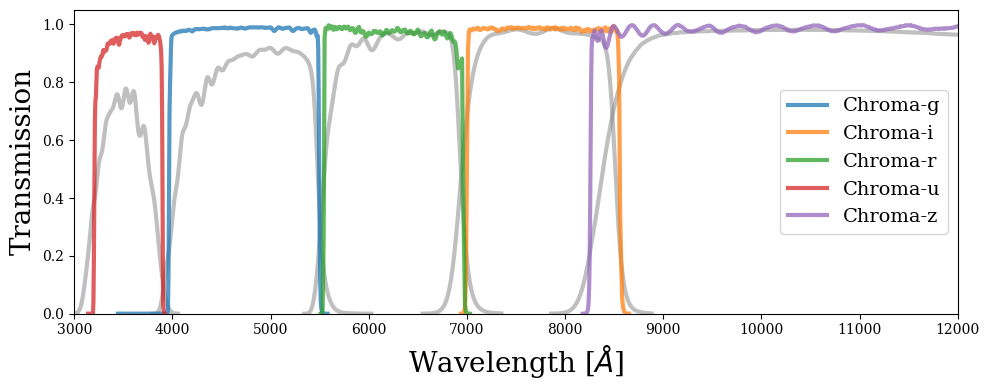

In [34]:
fig = plt.figure(figsize=(10, 4))
#	Chroma
for chroma_filter_file in chroma_filter_files:
	filte = os.path.basename(chroma_filter_file).split('_')[1].replace('-ascii.eff.txt', '')
	intbl = Table.read(chroma_filter_file, format='ascii')
	indx = np.where(intbl['col2']>1e-4)
	plt.plot(intbl['col1'][indx]*1e1, intbl['col2'][indx], lw=3, alpha=0.75, label=f"Chroma-{filte}")

#	SDSS
for sdss_filter_file in sdss_filter_files:
	intbl = Table.read(sdss_filter_file, format='ascii')
	indx = np.where(intbl['col2']>1e-4)
	plt.plot(intbl['col1'][indx], intbl['col2'][indx], color='grey', lw=3, alpha=0.5, zorder=0)

#
plt.ylim(0, 1.05)
plt.xlim(3000, 12000)
plt.ylabel('Transmission')
plt.xlabel(r"Wavelength [$\AA$]")
plt.legend(loc='center right', fontsize=14)
plt.tight_layout()